In [1]:
# Import the Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import requests
import re 
%matplotlib inline


###### 1- Gather

#### import The data

In [2]:
#### import twitter-archive data
tw_arch = pd.read_csv('twitter-archive-enhanced.csv')

#Import image prediction
image_prediction_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
RE = requests.get(image_prediction_url)

with open(image_prediction_url.split('/')[-1], mode = 'wb') as file:
    file.write(RE.content)
    
images_df = pd.read_csv('image-predictions.tsv', sep = '\t')
#import tweet-json
tw_data = pd.read_json('tweet-json',lines=True)

###### The 3 dataframes are:-¶
- twitter-archive-enhanced
- image_prediction
- tweet-json

- I wil start to explore the data, First is twitter-archive-enhanced

In [3]:
#twitter-archive data
tw_arch.head() 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
print(tw_arch.info())
print(tw_arch.sample(8))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [5]:
tw_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [6]:
tw_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [7]:
tw_arch[tw_arch['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [8]:
#check missing values
tw_arch.columns[tw_arch.isnull().any()]

Index(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls'],
      dtype='object')

## Archive tweets have missing values and it has 2356 entries.

# 2. Image Predictions data

In [9]:
print(images_df.describe())

           tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01


In [10]:
print(images_df.info) 
print(images_df.shape)
print(images_df.dtypes)
print(images_df.head(81))

<bound method DataFrame.info of                 tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_

In [11]:
#cheking for null values 
images_df.columns[images_df.isnull().any()]

Index([], dtype='object')

### Image Predictionshave have no missing values but it has 2075 entries.

## 3.Twitter json data


In [12]:
print(tw_data.info) 
print(tw_data.shape)
print(tw_data.dtypes)
print(tw_data.head(81))

<bound method DataFrame.info of                     created_at                  id              id_str  \
0    2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1    2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2    2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   
3    2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
4    2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   
...                        ...                 ...                 ...   
2349 2015-11-16 00:24:50+00:00  666049248165822465  666049248165822464   
2350 2015-11-16 00:04:52+00:00  666044226329800704  666044226329800704   
2351 2015-11-15 23:21:54+00:00  666033412701032449  666033412701032448   
2352 2015-11-15 23:05:30+00:00  666029285002620928  666029285002620928   
2353 2015-11-15 22:32:08+00:00  666020888022790149  666020888022790144   

                                              full_text  truncated  \
0     Thi

In [13]:
tw_data.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [14]:
#check missing values
tw_data.columns[tw_data.isnull().any()]

Index(['extended_entities', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo',
       'coordinates', 'place', 'contributors', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'retweeted_status', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status'],
      dtype='object')

#### tw_data have have missing values and 2354 entries.

# Quality Issues

- 1- Wrong Datatype:- timestamp -> datetime
-  tweet_id in tha datasets  --> should be object(string)

- 2- Clean invalid dog names

- 3- Some of the rating numerators are not correctly extracted.(srating_numerator,rating_denominator)--->- columns have extrem value should merge to be rating_value as one columns
- 4 Create a rating column by dividing rating_numerator values by rating_denominator values to use in data analysis-

- 5 -None in doggo, floofer, pupper, puppo columns is treated as a non-null value. 
- 6- Remove html tags from source column to make it more readable.
- 7- Remove retweets as you only want original dog ratings.(in_reply_to_status_id,in_reply_to_user_id, 
   retweeted_status_id,in_reply_to_user_id ))
- 8-Extract The right predictions
- 9-remove retweet-related columns after removing rows with retweets as these columns become empty.
- 10-remove retweets (text starting with RT @). 


## Tideness
 -  Twitter-archive -->Dog Stages such as (doggo,floofer,pupper,puppo) Should be in one column.
 - All data   ---> must be comined together .


## Cleaning 

In [15]:
#Create copies of the Dataframes:

cleaned_tw_arch = tw_arch.copy()
cleaned_images_df = images_df.copy()
cleaned_tw_data = tw_data.copy()

# 1- Twitter-archive

- Define

Change the timestamp -> datetime

- Code 

In [16]:
#Wrong Datatype:
# timestamp -> datetime
cleaned_tw_arch['timestamp'] = pd.to_datetime(cleaned_tw_arch['timestamp'])

- Test

In [17]:
cleaned_tw_arch.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

- Define

Drop columns - Retweet columns

- Code

In [18]:
# Drop columns - Retweet columns
dropcolumn= ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls']
cleaned_tw_arch.drop(dropcolumn,axis=1,inplace=True)

- Test

In [19]:
cleaned_tw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

- Define

 - tweet_id should be object(string)

Code:

In [20]:
cleaned_tw_arch['tweet_id'] = cleaned_tw_arch['tweet_id'].astype(str)

- Tset

In [21]:
cleaned_tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   rating_numerator    2356 non-null   int64              
 5   rating_denominator  2356 non-null   int64              
 6   name                2356 non-null   object             
 7   doggo               2356 non-null   object             
 8   floofer             2356 non-null   object             
 9   pupper              2356 non-null   object             
 10  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 202.6+ KB


- Define

 - removing rating_denominator not equal 10


Code:

In [22]:
cleaned_tw_arch=cleaned_tw_arch[cleaned_tw_arch['rating_denominator']==10]

- Tset

In [23]:
cleaned_tw_arch[cleaned_tw_arch['rating_denominator']!=10].count()[0]

0

Define 

Combine rating_numerator and rating_denominator columns into one column

code

In [24]:
#Combine rating_numerator and rating_denominator columns into one column
cleaned_tw_arch['rating'] = cleaned_tw_arch.rating_numerator / cleaned_tw_arch.rating_denominator

Test

In [25]:
cleaned_tw_arch.head(35)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,1.2
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,None,None,None,None,1.3
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,None,None,None,1.3
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,None,None,None,None,1.3
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,None,None,None,1.3
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,None,None,None,1.4


- Define 

- None in doggo, floofer, pupper, puppo columns is treated as a non-null value. 

- Code:

In [26]:
#to change none to NaN value in tw_arch dataframe's names,
#we will find names with lower and change it to NaN values This should be converted to null np.nan.
a = cleaned_tw_arch.name.str.islower()
column_name = 'name'
cleaned_tw_arch.loc[a, column_name] = np.nan
cleaned_tw_arch.name.replace("None", np.nan, inplace = True)

- Test

In [27]:
cleaned_tw_arch.sample(7) 

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
409,823333489516937216,2017-01-23 00:56:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@HistoryInPics 13/10,13,10,NaN,None,None,None,None,1.3
477,815990720817401858,2017-01-02 18:38:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jack. He's one of the rare doggos that do...,11,10,Jack,None,None,None,None,1.1
680,788908386943430656,2016-10-20 01:03:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Lucy. She destroyed not one, but two r...",11,10,Lucy,None,None,None,None,1.1
1200,716730379797970944,2016-04-03 20:53:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",There has clearly been a mistake. Pup did noth...,12,10,NaN,None,None,None,None,1.2
1107,734776360183431168,2016-05-23 16:01:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Livvie. Someone should tell her it's b...,11,10,Livvie,None,None,None,None,1.1
2196,668852170888998912,2015-11-23 18:02:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bobb. Bobb is a Golden High Fescu...,11,10,Bobb,None,None,None,None,1.1
854,765222098633691136,2016-08-15 16:22:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Gromit. He's pupset because there's no...,10,10,Gromit,None,None,None,None,1.0


- Define

Dog Stages such as (doggo,floofer,pupper,puppo) Should be in one column.

- code

In [28]:
# Now I will add the Stage column and store the value of each stages :
dog_Stages = []
x = ['pupper', 'puppo', 'doggo', 'floof']
y = ['pupper', 'puppo', 'doggo', 'floof']

for row in cleaned_tw_arch['text']:
    row = row.lower()
    for word in x:
        if word in str(row):
            dog_Stages.append(y[x.index(word)])
            break
    else:
        dog_Stages.append('None')
        
cleaned_tw_arch['dog_type'] = dog_Stages


- Tset

In [29]:
cleaned_tw_arch['dog_type'].value_counts()

None      1891
pupper     276
doggo       92
puppo       38
floof       36
Name: dog_type, dtype: int64

In [30]:
# removing extra columns
cleaned_tw_arch.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

Define

- Clean invalid dog names like " a "

 code:

In [31]:
cleaned_tw_arch=cleaned_tw_arch[cleaned_tw_arch['name']!= "None"]
cleaned_tw_arch=cleaned_tw_arch[cleaned_tw_arch['name']!= "a"]

Test

Define :

Remove retweets (text starting with RT @) as per project instruction. 

Code

In [32]:
cleaned_tw_arch = cleaned_tw_arch.loc[cleaned_tw_arch['text'].str.startswith('RT') == False]

Test

In [33]:
cleaned_tw_arch.sample(9)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,rating,dog_type
1283,708711088997666817,2016-03-12 17:47:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Smokey. He really likes tennis balls. ...,11,10,Smokey,1.1,None
1075,739623569819336705,2016-06-06 01:02:55+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a doggo that don't need no human. 12/10...,12,10,NaN,1.2,doggo
54,881666595344535552,2017-07-03 00:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He couldn't miss this puppertuni...,13,10,Gary,1.3,pupper
1007,747600769478692864,2016-06-28 01:21:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,10,10,Bookstore,1.0,None
353,831309418084069378,2017-02-14 01:09:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Scooter and his son Montoya. Scooter ...,12,10,Scooter,1.2,None
1495,692535307825213440,2016-01-28 02:30:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Amber. She's a Fetty Woof. 10/10 would...,10,10,Amber,1.0,None
445,819227688460238848,2017-01-11 17:01:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Finn. He's wondering if you come here ...,12,10,Finn,1.2,None
251,844979544864018432,2017-03-23 18:29:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: I'm proud to announce that Toby is 23...,13,10,NaN,1.3,None
768,777621514455814149,2016-09-18 21:33:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. You can't look at him and not s...,12,10,Derek,1.2,None


Define :

Remove html tags from source column to make it more readable.



Code:

In [34]:
import re 

In [35]:
#Remove html tags from source
cleaned_tw_arch.source = cleaned_tw_arch.source.apply(lambda x: re.findall(r'>(.*)<',x)[0])

Test:

In [36]:
cleaned_tw_arch.source.value_counts()

Twitter for iPhone     2019
Vine - Make a Scene      90
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [37]:
cleaned_tw_arch.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'rating', 'dog_type'],
      dtype='object')

In [38]:
cleaned_tw_arch.shape[0]

2151

In [39]:
cleaned_tw_arch.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,rating,dog_type
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,1.3,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,1.3,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,1.2,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,1.3,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,1.2,None


In [40]:
cleaned_tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2151 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2151 non-null   object             
 1   timestamp           2151 non-null   datetime64[ns, UTC]
 2   source              2151 non-null   object             
 3   text                2151 non-null   object             
 4   rating_numerator    2151 non-null   int64              
 5   rating_denominator  2151 non-null   int64              
 6   name                1388 non-null   object             
 7   rating              2151 non-null   float64            
 8   dog_type            2151 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(5)
memory usage: 168.0+ KB


#### 2. Image Predictions data

- Define :
-  tweet_id in tha datasets  --> should be object(string)

In [41]:
cleaned_images_df.tweet_id = cleaned_images_df.tweet_id.astype(str)

Define:

- extract the right prediction

- Code :

In [42]:
prediction = []
confidence = []
for index, row in cleaned_images_df.iterrows():
    if (row['p1_dog'] == True):
        prediction.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif (row['p2_dog'] == True):
        prediction.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif (row['p3_dog'] == True):
        prediction.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        prediction.append('NaN')
        confidence.append(0)

In [43]:
## Add prediction to the dataframe:
cleaned_images_df['prediction'] = prediction
cleaned_images_df['pre_conf'] = confidence

In [44]:
## drop the columns :
cleaned_images_df.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1,inplace=True)

In [45]:
cleaned_images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   object 
 1   jpg_url     2075 non-null   object 
 2   prediction  2075 non-null   object 
 3   pre_conf    2075 non-null   float64
dtypes: float64(1), object(3)
memory usage: 65.0+ KB


In [46]:
cleaned_images_df.head()

,tweet_id,jpg_url,prediction,pre_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


In [47]:
cleaned_images_df.columns[cleaned_images_df.isnull().any()]

Index([], dtype='object')

# 3.Twitter json data


Define :

-  tweet_id in tha datasets  --> should be object(string)and change it name so we can merge the data 

In [48]:
cleaned_tw_data.rename(columns =  {'id': 'tweet_id'},inplace=True) 

In [49]:
cleaned_tw_data.tweet_id = cleaned_tw_data.tweet_id.astype(str)

In [50]:
cleaned_tw_data.head(6)

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
5,2017-07-29 00:08:17+00:00,891087950875897856,891087950875897856,Here we have a majestic great white breaching ...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,20562,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


- Clean unnecessary columns

In [51]:
dropco = [ 'in_reply_to_status_id','favorited','retweeted','geo','in_reply_to_screen_name',
                  'in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id',
                  'in_reply_to_user_id_str','is_quote_status','lang','place','possibly_sensitive',
                  'possibly_sensitive_appealable','quoted_status',
                  'created_at','contributors','coordinates','entities','extended_entities',
                  'quoted_status_id','quoted_status_id_str','quoted_status_id_str','truncated','user']
cleaned_tw_data.drop(dropco ,axis=1,inplace=True)

In [67]:
cleaned_tw_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2354 non-null   object
 1   id_str              2354 non-null   int64 
 2   full_text           2354 non-null   object
 3   display_text_range  2354 non-null   object
 4   source              2354 non-null   object
 5   retweet_count       2354 non-null   int64 
 6   favorite_count      2354 non-null   int64 
 7   retweeted_status    179 non-null    object
dtypes: int64(3), object(5)
memory usage: 147.2+ KB


## Creating the Master dataframe :¶


In [52]:
cleaned_tw_arch['tweet_id'] = cleaned_tw_arch['tweet_id'].astype(str)

In [53]:
cleaned_tw_arch

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,rating,dog_type
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,1.3,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,1.3,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,1.2,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,1.3,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,1.2,None
...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,NaN,0.5,None
2352,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,10,NaN,0.6,None
2353,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,NaN,0.9,None
2354,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10,NaN,0.7,None


In [54]:
Master = pd.merge(cleaned_tw_arch, cleaned_tw_data, on='tweet_id', how='left')

In [55]:
Master2 = pd.merge(Master, cleaned_images_df, on='tweet_id',how='left')

In [56]:
Master2.head()

,tweet_id,timestamp,source_x,text,rating_numerator,rating_denominator,name,rating,dog_type,id_str,full_text,display_text_range,source_y,retweet_count,favorite_count,retweeted_status,jpg_url,prediction,pre_conf
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,1.3,None,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]","<a href=""http://twitter.com/download/iphone"" r...",8853,39467,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,1.3,None,892177421306343424,This is Tilly. She's just checking pup on you....,"[0, 138]","<a href=""http://twitter.com/download/iphone"" r...",6514,33819,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,1.2,None,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]","<a href=""http://twitter.com/download/iphone"" r...",4328,25461,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,1.3,None,891689557279858688,This is Darla. She commenced a snooze mid meal...,"[0, 79]","<a href=""http://twitter.com/download/iphone"" r...",8964,42908,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,1.2,None,891327558926688256,This is Franklin. He would like you to stop ca...,"[0, 138]","<a href=""http://twitter.com/download/iphone"" r...",9774,41048,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712


In [57]:

## check duplications:
Master2.info()
Master2.tweet_id.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2151 entries, 0 to 2150
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2151 non-null   object             
 1   timestamp           2151 non-null   datetime64[ns, UTC]
 2   source_x            2151 non-null   object             
 3   text                2151 non-null   object             
 4   rating_numerator    2151 non-null   int64              
 5   rating_denominator  2151 non-null   int64              
 6   name                1388 non-null   object             
 7   rating              2151 non-null   float64            
 8   dog_type            2151 non-null   object             
 9   id_str              2151 non-null   int64              
 10  full_text           2151 non-null   object             
 11  display_text_range  2151 non-null   object             
 12  source_y            2151 non-null 

0

In [58]:
## Save the master data into 'master_df.csv':
Master2.to_csv('master_df.csv')

# Insight :


In [59]:
Master2.head()

,tweet_id,timestamp,source_x,text,rating_numerator,rating_denominator,name,rating,dog_type,id_str,full_text,display_text_range,source_y,retweet_count,favorite_count,retweeted_status,jpg_url,prediction,pre_conf
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,1.3,None,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]","<a href=""http://twitter.com/download/iphone"" r...",8853,39467,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,1.3,None,892177421306343424,This is Tilly. She's just checking pup on you....,"[0, 138]","<a href=""http://twitter.com/download/iphone"" r...",6514,33819,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,1.2,None,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]","<a href=""http://twitter.com/download/iphone"" r...",4328,25461,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,1.3,None,891689557279858688,This is Darla. She commenced a snooze mid meal...,"[0, 79]","<a href=""http://twitter.com/download/iphone"" r...",8964,42908,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,1.2,None,891327558926688256,This is Franklin. He would like you to stop ca...,"[0, 138]","<a href=""http://twitter.com/download/iphone"" r...",9774,41048,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712


In [60]:
Master2.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2151 entries, 0 to 2150
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2151 non-null   object             
 1   timestamp           2151 non-null   datetime64[ns, UTC]
 2   source_x            2151 non-null   object             
 3   text                2151 non-null   object             
 4   rating_numerator    2151 non-null   int64              
 5   rating_denominator  2151 non-null   int64              
 6   name                1388 non-null   object             
 7   rating              2151 non-null   float64            
 8   dog_type            2151 non-null   object             
 9   id_str              2151 non-null   int64              
 10  full_text           2151 non-null   object             
 11  display_text_range  2151 non-null   object             
 12  source_y            2151 non-null 

In [77]:
Master2.describe()

,rating_numerator,rating_denominator,rating,id_str,retweet_count,favorite_count,pre_conf
count,2151.000000,2151.0,2151.000000,2.151000e+03,2151.000000,2151.000000,1975.000000
mean,12.251976,10.0,1.225198,7.372893e+17,2762.140865,8781.050209,0.464325
std,42.699237,0.0,4.269924,6.762896e+16,4655.203638,12094.697050,0.339481
min,0.000000,10.0,0.000000,6.660209e+17,0.000000,52.000000,0.000000
25%,10.000000,10.0,1.000000,6.767941e+17,608.000000,1902.500000,0.140041
50%,11.000000,10.0,1.100000,7.099013e+17,1343.000000,4077.000000,0.458746
75%,12.000000,10.0,1.200000,7.896140e+17,3222.000000,11117.000000,0.773964
max,1776.000000,10.0,177.600000,8.924206e+17,79515.000000,132810.000000,0.999956


- we can see that the highest number of retweets of one tweet is 79515. and the favorite is 132810.

In [62]:
#count the top Name 

Lucy       11
Charlie    11
Cooper     10
Oliver     10
Penny       9
           ..
Staniel     1
Chef        1
Fwed        1
Jeffri      1
Zooey       1
Name: name, Length: 928, dtype: int64

- The top Names are Lucy and Charlie 

In [63]:
## Top prediction:
Master2.prediction.value_counts()

NaN                     307
golden_retriever        154
Labrador_retriever      105
Pembroke                 95
Chihuahua                90
                       ... 
Scotch_terrier            1
Bouvier_des_Flandres      1
standard_schnauzer        1
silky_terrier             1
Japanese_spaniel          1
Name: prediction, Length: 114, dtype: int64

In [66]:
# Find the dog with the highest rating.
Master2.loc[Master2['rating'].idxmax()]

tweet_id                                             749981277374128128
timestamp                                     2016-07-04 15:00:45+00:00
source_x                                                      TweetDeck
text                  This is Atticus. He's quite simply America af....
rating_numerator                                                   1776
rating_denominator                                                   10
name                                                            Atticus
rating                                                            177.6
dog_type                                                           None
id_str                                               749981277374128128
full_text             This is Atticus. He's quite simply America af....
display_text_range                                              [0, 54]
source_y              <a href="https://about.twitter.com/products/tw...
retweet_count                                                   

In [ ]:

display(HTML('<img src="https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg" />'))

In [67]:
Master2['prediction'].value_counts()

NaN                     307
golden_retriever        154
Labrador_retriever      105
Pembroke                 95
Chihuahua                90
                       ... 
Scotch_terrier            1
Bouvier_des_Flandres      1
standard_schnauzer        1
silky_terrier             1
Japanese_spaniel          1
Name: prediction, Length: 114, dtype: int64

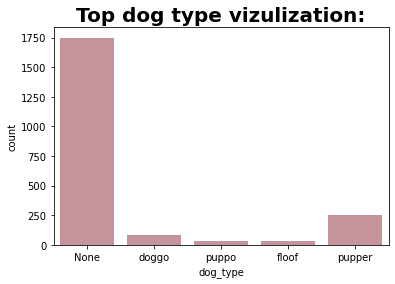

In [100]:
plt.title('  Top dog type vizulization:  ',fontsize = 20, weight = "bold");
sns.countplot(data=Master2, x='dog_type', color='#CD8C95' );
# Use xticks to rotate the category labels (not axes) counter-clockwise

We can conclude from the previous charts ans analysis that There are dogs with undiscovered dog stages.
It is a very large number and will consume more time to clean.
.For now, I will exclude the category 'None' and continue to analyze it.

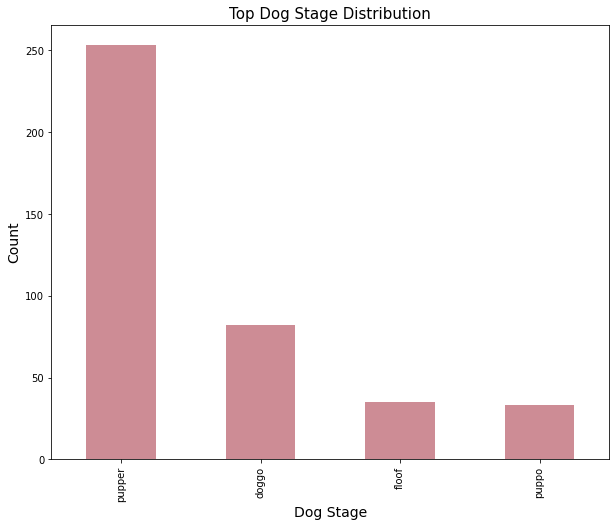

In [94]:
plt.figure(figsize=[10,8])
dog_stages=Master2.groupby('dog_type').filter(lambda x: len(x) < 500)
dog_stages['dog_type'].value_counts().plot(kind = 'bar',color='#CD8C95')
plt.title('Top Dog Stage Distribution',fontsize=15)
plt.ylabel('Count', fontsize=14);
plt.xlabel('Dog Stage', fontsize=14);

Top Dog Stage is pupper

In [98]:
## Top prediction vizulization:

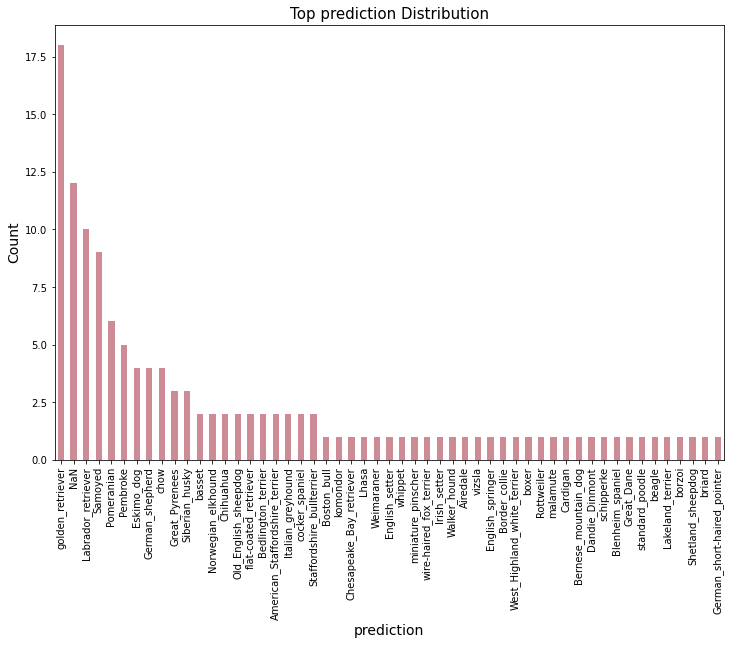

In [118]:
plt.figure(figsize=[12,8])
prediction=Master2.groupby('dog_type').filter(lambda x: len(x) < 160)
prediction['prediction'].value_counts().plot(kind = 'bar',color='#CD8C95')
plt.title('Top prediction Distribution',fontsize=15)
plt.ylabel('Count', fontsize=14);
plt.xlabel('prediction', fontsize=14);

- We can see that the top predection is the golden_retrievevr